## ÏäµÎèÑ Î≤îÏ£º Î≥Ñ ÎßàÏä§ÌÅ¨ ÌåêÎß§Îüâ

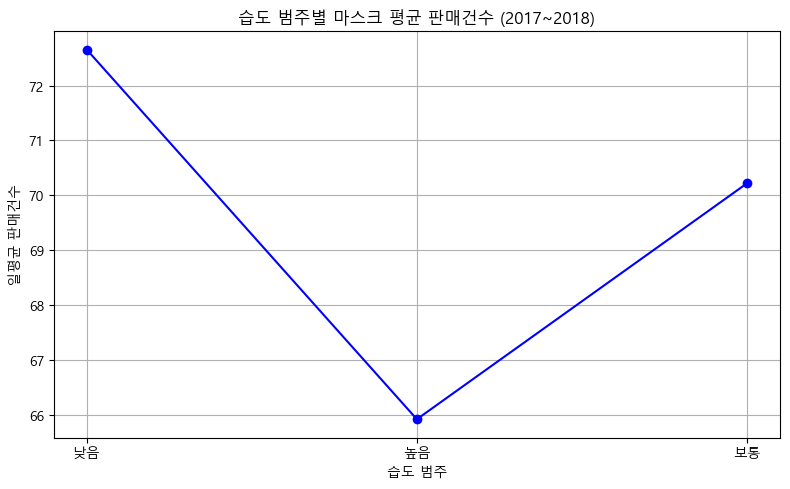

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ÏäµÎèÑ Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨
air_2017 = pd.read_csv("./data/SURFACE_air_pollution_2017.csv", encoding="cp949")
air_2018 = pd.read_csv("./data/SURFACE_air_pollution_2018.csv", encoding="cp949")
humidity_df = pd.concat([air_2017, air_2018], ignore_index=True)

humidity_df = humidity_df[["ÏùºÏãú", "ÏäµÎèÑ(%)"]].dropna()
humidity_df.columns = ["ÏùºÏãú", "ÏäµÎèÑ"]
humidity_df["ÏùºÏãú"] = pd.to_datetime(humidity_df["ÏùºÏãú"], errors="coerce")
humidity_df = humidity_df.dropna(subset=["ÏùºÏãú"])
humidity_daily = humidity_df.groupby(humidity_df["ÏùºÏãú"].dt.date)["ÏäµÎèÑ"].mean().reset_index()
humidity_daily.columns = ["ÎÇ†Ïßú", "ÌèâÍ∑†ÏäµÎèÑ"]
humidity_daily["ÎÇ†Ïßú"] = pd.to_datetime(humidity_daily["ÎÇ†Ïßú"])

# 2. ÎßàÏä§ÌÅ¨ ÌåêÎß§ Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è ÎÇ†Ïßú Ï≤òÎ¶¨
mask_df = pd.read_csv("./data/20190509_mask_POS.csv", encoding="utf-8")
mask_df["Calendar DayÏùº 2"] = pd.to_datetime(mask_df["Calendar DayÏùº 2"], errors="coerce")
mask_df = mask_df.dropna(subset=["Calendar DayÏùº 2"])
mask_df = mask_df[mask_df["Calendar DayÏùº 2"].dt.year <= 2018]  # 2018ÎÖÑÍπåÏßÄ ÌïÑÌÑ∞ÎßÅ

# 3. ÏùºÏûêÎ≥Ñ ÌåêÎß§Í±¥Ïàò ÏßëÍ≥Ñ
mask_daily = mask_df.groupby(mask_df["Calendar DayÏùº 2"].dt.date).size().reset_index(name="ÌåêÎß§Í±¥Ïàò")
mask_daily.columns = ["ÎÇ†Ïßú", "ÌåêÎß§Í±¥Ïàò"]
mask_daily["ÎÇ†Ïßú"] = pd.to_datetime(mask_daily["ÎÇ†Ïßú"])

# 4. ÌåêÎß§ Îç∞Ïù¥ÌÑ∞ÏôÄ ÏäµÎèÑ Î≥ëÌï©
merged_df = pd.merge(mask_daily, humidity_daily, on="ÎÇ†Ïßú", how="inner")

# 5. ÏäµÎèÑ Î≤îÏ£º Íµ¨Î∂Ñ
def humidity_category(h):
    if h < 40:
        return "ÎÇÆÏùå"
    elif h <= 70:
        return "Î≥¥ÌÜµ"
    else:
        return "ÎÜíÏùå"

merged_df["ÏäµÎèÑÎ≤îÏ£º"] = merged_df["ÌèâÍ∑†ÏäµÎèÑ"].apply(humidity_category)

# 6. Î≤îÏ£ºÎ≥Ñ ÌèâÍ∑† ÌåêÎß§Í±¥Ïàò Í≥ÑÏÇ∞
summary = merged_df.groupby("ÏäµÎèÑÎ≤îÏ£º")["ÌåêÎß§Í±¥Ïàò"].mean().reset_index()

# 7. ÏãúÍ∞ÅÌôî
plt.rcParams['font.family'] = 'Malgun Gothic'  # macOSÎäî 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# Í∫æÏùÄÏÑ†Í∑∏ÎûòÌîÑ
plt.figure(figsize=(8, 5))
plt.plot(summary['ÏäµÎèÑÎ≤îÏ£º'], summary['ÌåêÎß§Í±¥Ïàò'], marker='o', linestyle='-', color='blue')

plt.title('ÏäµÎèÑ Î≤îÏ£ºÎ≥Ñ ÎßàÏä§ÌÅ¨ ÌèâÍ∑† ÌåêÎß§Í±¥Ïàò (2017~2018)')
plt.xlabel('ÏäµÎèÑ Î≤îÏ£º')
plt.ylabel('ÏùºÌèâÍ∑† ÌåêÎß§Í±¥Ïàò')
plt.grid(True)
plt.tight_layout()
plt.show()

## ÎØ∏ÏÑ∏Î®ºÏßÄ(PM10) Îì±Í∏â Î≥Ñ ÎåÄÍ∏∞Ïò§Ïóº Î¨ºÏßàÏùò ÌèâÍ∑† ÎÜçÎèÑ

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


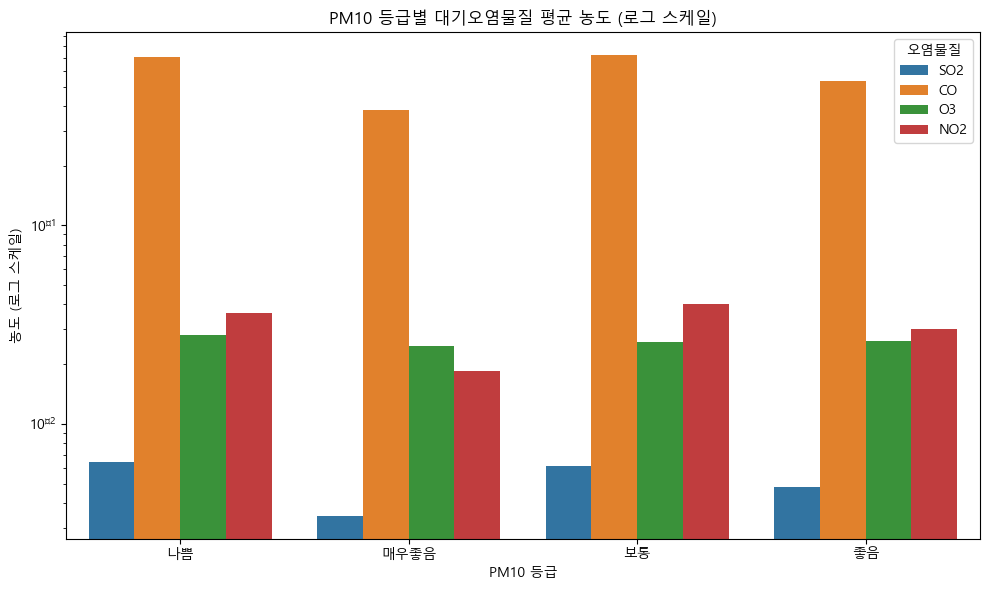

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ÏÇ¨Ïö©Ìï† ÌååÏùº Î™©Î°ù
dust_files = [
    './data/1701Q_dust.csv',
    './data/1702Q_dust.csv',
    './data/1703Q_dust.csv',
    './data/1704Q_dust.csv',
    './data/1801Q_dust.csv',
    './data/1802Q_dust.csv',
    './data/1803Q_dust.csv',
]

# 2. ÌïÑÏöîÌïú Ïó¥Îßå ÏÑ†ÌÉùÌï¥ÏÑú Î©îÎ™®Î¶¨ Ï†àÏïΩÌïòÎ©∞ Î∂àÎü¨Ïò§Í∏∞
required_columns = ['SO2', 'CO', 'O3', 'NO2', 'PM10']
dust_df_list = [
    pd.read_csv(file, encoding='utf-8', usecols=lambda c: c in required_columns)
    for file in dust_files
]
dust_df = pd.concat(dust_df_list, ignore_index=True)

# 3. Í≤∞Ï∏°Ïπò Ï†úÍ±∞ Î∞è PM10 Îì±Í∏â Î∂ÑÎ•ò
dust_df = dust_df.dropna(subset=['PM10'])

def pm10_grade(pm10):
    if pm10 <= 30:
        return 'Îß§Ïö∞Ï¢ãÏùå'
    elif pm10 <= 80:
        return 'Ï¢ãÏùå'
    elif pm10 <= 150:
        return 'Î≥¥ÌÜµ'
    else:
        return 'ÎÇòÏÅ®'

dust_df['PM10Îì±Í∏â'] = dust_df['PM10'].apply(pm10_grade)

# 4. Îì±Í∏âÎ≥Ñ Ïò§ÏóºÎ¨ºÏßà ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
pollutant_cols = ['SO2', 'CO', 'O3', 'NO2']
grouped = dust_df.groupby('PM10Îì±Í∏â')[pollutant_cols].mean().reset_index()

# 5. ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú long format Î≥ÄÌôò
dust_pollutants_melted = grouped.melt(id_vars='PM10Îì±Í∏â', var_name='Ïò§ÏóºÎ¨ºÏßà', value_name='ÎÜçÎèÑ')

# 6. ÏãúÍ∞ÅÌôî
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows ÏÇ¨Ïö©ÏûêÏö©
plt.rcParams['axes.unicode_minus'] = False     # ÏùåÏàò Íπ®Ïßê Î∞©ÏßÄ

plt.figure(figsize=(10, 6))
sns.barplot(data=dust_pollutants_melted, x='PM10Îì±Í∏â', y='ÎÜçÎèÑ', hue='Ïò§ÏóºÎ¨ºÏßà')
plt.yscale('log')  # Î°úÍ∑∏ Ïä§ÏºÄÏùº Ï†ÅÏö©
plt.title('PM10 Îì±Í∏âÎ≥Ñ ÎåÄÍ∏∞Ïò§ÏóºÎ¨ºÏßà ÌèâÍ∑† ÎÜçÎèÑ (Î°úÍ∑∏ Ïä§ÏºÄÏùº)')
plt.xlabel('PM10 Îì±Í∏â')
plt.ylabel('ÎÜçÎèÑ (Î°úÍ∑∏ Ïä§ÏºÄÏùº)')
plt.legend(title='Ïò§ÏóºÎ¨ºÏßà')
plt.tight_layout()
plt.show()

## Ìï†Ïù∏Ïó¨Î∂Ä Î≥Ñ ÌåêÎß§ÏßÄÌëú

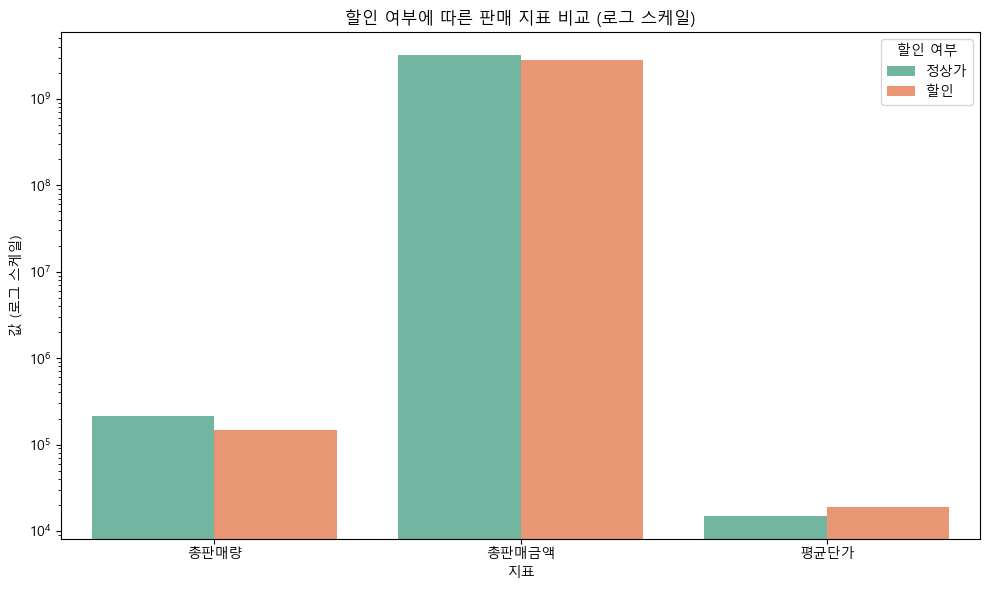

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# üìä Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("./data/20190509_mask_POS.csv", encoding="utf-8")

# 1. ÌïÑÏöîÌïú Ïó¥ ÌïÑÌÑ∞ÎßÅ
df_price = df[['ÌíàÎ™©Î™Ö', 'Í∞ÄÍ≤©', 'Sales SU', 'Í∏àÏï°']].dropna()
df_price = df_price[df_price['Sales SU'] > 0]

# 2. ÌíàÎ™©Î≥Ñ Ï†ïÏÉÅÎã®Í∞Ä Í≥ÑÏÇ∞
avg_price = df_price.groupby('ÌíàÎ™©Î™Ö')['Í∞ÄÍ≤©'].mean().reset_index().rename(columns={'Í∞ÄÍ≤©': 'Ï†ïÏÉÅÎã®Í∞Ä'})

# 3. Ìï†Ïù∏ Ïó¨Î∂Ä ÏÉùÏÑ±
df_price = df_price.merge(avg_price, on='ÌíàÎ™©Î™Ö', how='left')
df_price['Ìï†Ïù∏Ïó¨Î∂Ä'] = df_price['Í∞ÄÍ≤©'] < df_price['Ï†ïÏÉÅÎã®Í∞Ä']
df_price['Ìï†Ïù∏Ïó¨Î∂Ä'] = df_price['Ìï†Ïù∏Ïó¨Î∂Ä'].map({True: 'Ìï†Ïù∏', False: 'Ï†ïÏÉÅÍ∞Ä'})

# 4. Ìï†Ïù∏ Ïó¨Î∂ÄÎ≥Ñ ÏßëÍ≥Ñ
grouped = df_price.groupby('Ìï†Ïù∏Ïó¨Î∂Ä').agg(
    Ï¥ùÌåêÎß§Îüâ=('Sales SU', 'sum'),
    Ï¥ùÌåêÎß§Í∏àÏï°=('Í∏àÏï°', 'sum')
).reset_index()
grouped['ÌèâÍ∑†Îã®Í∞Ä'] = grouped['Ï¥ùÌåêÎß§Í∏àÏï°'] / grouped['Ï¥ùÌåêÎß§Îüâ']

# 5. long ÌòïÌÉúÎ°ú Î≥ÄÌôò (ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ melt)
grouped_melted = grouped.melt(id_vars='Ìï†Ïù∏Ïó¨Î∂Ä', var_name='ÏßÄÌëú', value_name='Í∞í')

# 6. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_melted, x='ÏßÄÌëú', y='Í∞í', hue='Ìï†Ïù∏Ïó¨Î∂Ä', palette='Set2')

plt.yscale('log')  # Î°úÍ∑∏ Ïä§ÏºÄÏùº Ï†ÅÏö©
plt.title('Ìï†Ïù∏ Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÌåêÎß§ ÏßÄÌëú ÎπÑÍµê (Î°úÍ∑∏ Ïä§ÏºÄÏùº)')
plt.xlabel('ÏßÄÌëú')
plt.ylabel('Í∞í (Î°úÍ∑∏ Ïä§ÏºÄÏùº)')
plt.legend(title='Ìï†Ïù∏ Ïó¨Î∂Ä')
plt.tight_layout()
plt.show()

## Í≥ÑÏ†à Î≥Ñ ÌåêÎß§Îüâ

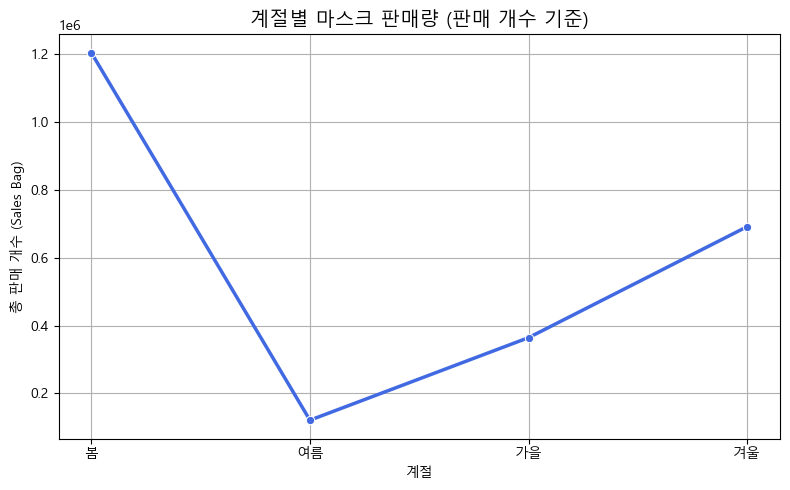

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# üìä 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('./data/20190509_mask_POS.csv', encoding='utf-8')

# 2. ÎÇ†Ïßú Ïª¨Îüº Ï≤òÎ¶¨
df['Calendar DayÏùº 2'] = pd.to_datetime(df['Calendar DayÏùº 2'], errors='coerce')
df = df.dropna(subset=['Calendar DayÏùº 2'])

# 3. Í≥ÑÏ†à Î∂ÑÎ•ò Ìï®Ïàò Ï†ïÏùò
def get_season(month):
    if month in [3, 4, 5]:
        return 'Î¥Ñ'
    elif month in [6, 7, 8]:
        return 'Ïó¨Î¶Ñ'
    elif month in [9, 10, 11]:
        return 'Í∞ÄÏùÑ'
    else:
        return 'Í≤®Ïö∏'

df['Í≥ÑÏ†à'] = df['Calendar DayÏùº 2'].dt.month.apply(get_season)

# 4. ÌåêÎß§Îüâ Í∏∞Ï§Ä: 'Sales (Bag)' ÏÇ¨Ïö©
df = df.dropna(subset=['Sales (Bag)'])

# 5. Í≥ÑÏ†àÎ≥Ñ ÌåêÎß§Îüâ ÏßëÍ≥Ñ
season_sales = df.groupby('Í≥ÑÏ†à')['Sales (Bag)'].sum().reindex(['Î¥Ñ', 'Ïó¨Î¶Ñ', 'Í∞ÄÏùÑ', 'Í≤®Ïö∏']).reset_index()

# 6. Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.lineplot(data=season_sales, x='Í≥ÑÏ†à', y='Sales (Bag)', marker='o', linewidth=2.5, color='royalblue')

plt.title('Í≥ÑÏ†àÎ≥Ñ ÎßàÏä§ÌÅ¨ ÌåêÎß§Îüâ (ÌåêÎß§ Í∞úÏàò Í∏∞Ï§Ä)', fontsize=14)
plt.xlabel('Í≥ÑÏ†à')
plt.ylabel('Ï¥ù ÌåêÎß§ Í∞úÏàò (Sales Bag)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Ïú†ÌÜµÏÇ¨ Î≥Ñ ÌåêÎß§Îüâ

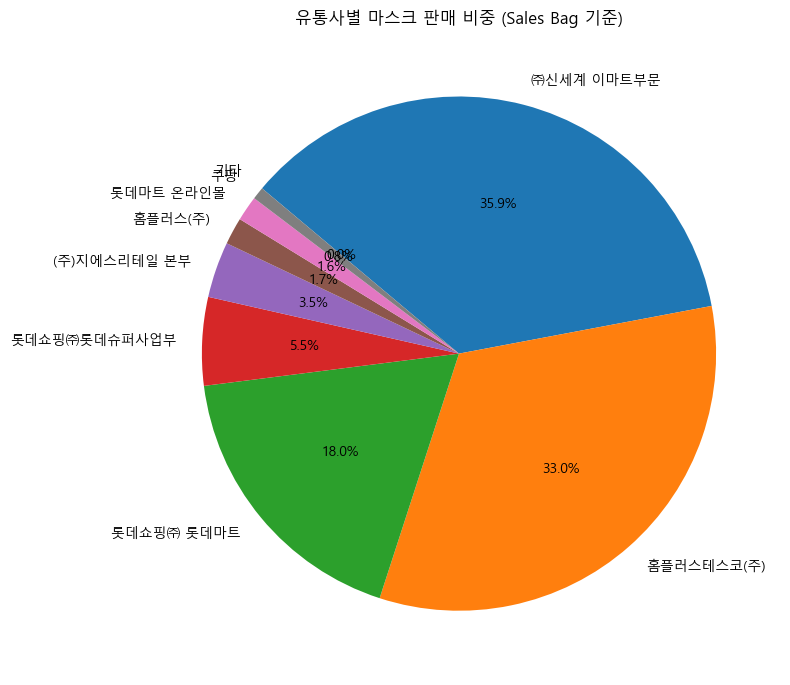

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("./data/20190509_mask_POS.csv", encoding="utf-8")

# 2. Ïú†ÌÜµÏÇ¨Î≥Ñ ÌåêÎß§Îüâ ÏßëÍ≥Ñ (ÌåêÎß§ Í∞úÏàò Í∏∞Ï§Ä: Sales (Bag))
df = df.dropna(subset=['Ïú†ÌÜµÏÇ¨', 'Sales (Bag)'])
dist_sales = df.groupby('Ïú†ÌÜµÏÇ¨')['Sales (Bag)'].sum().reset_index()

# 3. ÌåêÎß§Îüâ ÎπÑÏ§ë Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨ & ÏÉÅÏúÑ 8Í∞ú + Í∏∞ÌÉÄ Ï≤òÎ¶¨
dist_sales = dist_sales.sort_values(by='Sales (Bag)', ascending=False).reset_index(drop=True)

# ÏÉÅÏúÑ 8Í∞úÎßå ÌëúÏãú, ÎÇòÎ®∏ÏßÄÎäî 'Í∏∞ÌÉÄ'Î°ú Î¨∂Í∏∞
top_n = 8
if len(dist_sales) > top_n:
    top_df = dist_sales.iloc[:top_n].copy()
    other_sum = dist_sales.iloc[top_n:]['Sales (Bag)'].sum()
    top_df.loc[len(top_df)] = ['Í∏∞ÌÉÄ', other_sum]
else:
    top_df = dist_sales

# 4. ÌååÏù¥Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 8))
plt.pie(
    top_df['Sales (Bag)'],
    labels=top_df['Ïú†ÌÜµÏÇ¨'],
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False
)
plt.title('Ïú†ÌÜµÏÇ¨Î≥Ñ ÎßàÏä§ÌÅ¨ ÌåêÎß§ ÎπÑÏ§ë (Sales Bag Í∏∞Ï§Ä)')
plt.tight_layout()
plt.show()
